In [9]:
import pandas as pd
!pip install seaborn
import seaborn as sns 

# Load the dataset
data = pd.read_csv("Churn_Modelling.csv")

# Display the first few rows of the dataset
data.head()


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 393.8 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 435.7 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/294.9 kB 762.6 kB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
data.drop(columns=['RowNumber'],inplace=True)

In [3]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


C:\Users\Aesha\AppData\Local\Temp\ipykernel_26792\1604371376.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define feature columns
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender']

# Define transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

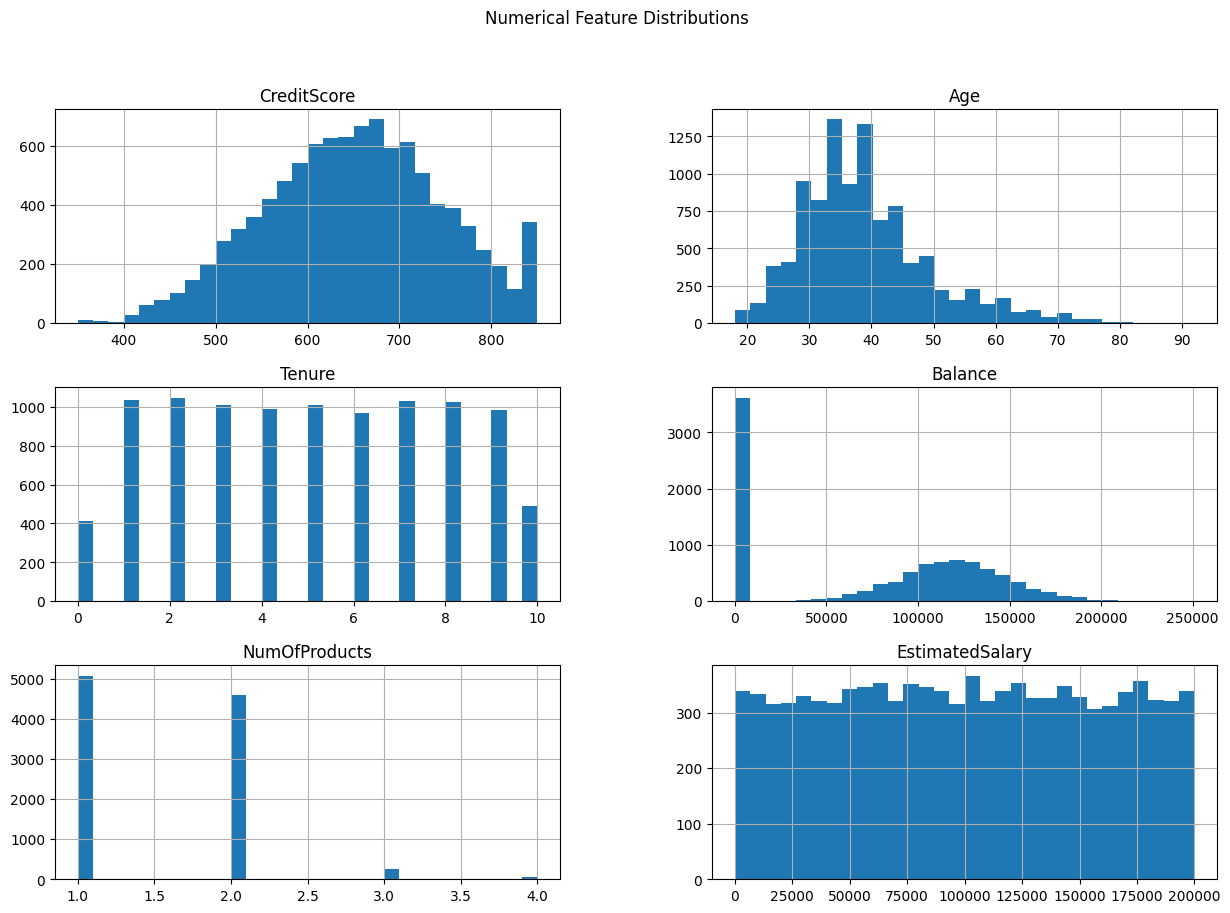

In [6]:
import matplotlib.pyplot as plt


# Plot distributions of numerical features
data[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Numerical Feature Distributions')
plt.show()

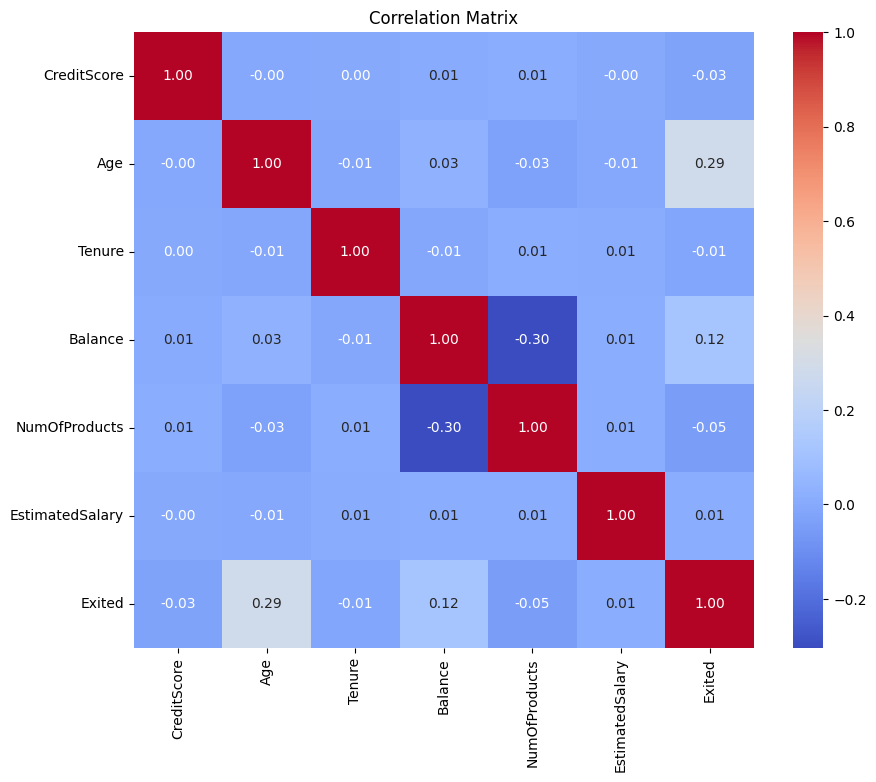

In [10]:
# Compute correlation matrix
corr_matrix = data[numerical_features + ['Exited']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

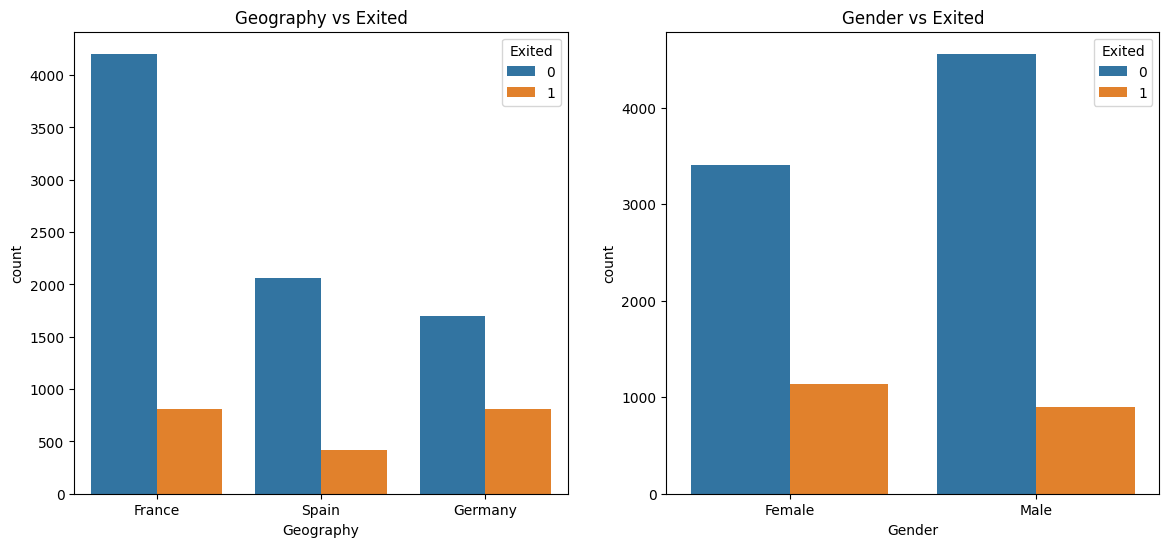

In [11]:
# Plot count plot for categorical features
plt.figure(figsize=(14, 6))

# Geography
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Geography', hue='Exited')
plt.title('Geography vs Exited')

# Gender
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Gender', hue='Exited')
plt.title('Gender vs Exited')

plt.show()

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into input features (X) and target variable (y)
X = data.drop('Exited', axis=1)
y = data['Exited']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate the models
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{name} ROC-AUC Score: {roc_auc_score(y_test, y_pred)}")
    print("\n")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.50      0.14      0.22       393

    accuracy                           0.80      2000
   macro avg       0.66      0.55      0.55      2000
weighted avg       0.76      0.80      0.76      2000

Logistic Regression ROC-AUC Score: 0.5528619224734028


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.70      0.49      0.57       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Random Forest ROC-AUC Score: 0.7171780267943523


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1607
          

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Create the Grid Search CV object
grid_search = GridSearchCV(
    estimator=Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier())]),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best ROC-AUC score: ", grid_search.best_score_)

Best parameters found:  {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best ROC-AUC score:  0.850969141517082


In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Create the Grid Search CV object
grid_search = GridSearchCV(
    estimator=Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier())]),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best ROC-AUC score: ", grid_search.best_score_)

Best parameters found:  {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Best ROC-AUC score:  0.8512325852782279


In [16]:
# Evaluate the final model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Final Model Classification Report:")
print(classification_report(y_test, y_pred))
print("Final Model ROC-AUC Score: ", roc_auc_score(y_test, y_pred))

Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1607
           1       0.75      0.43      0.55       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Final Model ROC-AUC Score:  0.6982389387397059
